# Како описати јавно здравље?
Здравствено стање неке особе је комплексан феномен чије описивање захтева прикупљање велике количине разнородних података: крвне слике, физичког прегледа, ултразвучних снимака, историје болести и сл. Када је потребно описати здравствено стање веће групе људи или чак целе нације, простор истраживачке анализе се додатно усложњава и постаје у правом смислу вишедимензионалан, односно *мултиваријантан*. То значи да је за извођење валидних и употребљивих закључака потребно измерити велики број својстава, тј. *варијабли* на великом узорку испитаника. Резултати овако опсежних истраживања су веома драгоцени, не само да би се добила повратна информација о најчешћим здравственим проблемима грађана, већ и да би се уочиле повезаности и међусобни утицаји измерених варијабли. Након тога се могу донети поуздане стратегије јавног здравља у оквиру којих би се грађани информисали о понашањима која су штетна или корисна за њихово физичко и психичко благостање.
### Пример података о јавном здрављу
У САД се у оквиру програма __[**National Health and Nutrition Examination Survey (NHANES)**](https://www.cdc.gov/Nchs/Nhanes/about_nhanes.htm)__ сваке године спроводи истраживање о здравственом стању становника и њиховим навикама у исхрани. Подаци се прикупљају интервјуисањем и физичким прегледом на *репрезентативном узорку* од 5.000 грађана. Репрезентативност је веома важна карактеристика узорка која омогућава да се закључци донети на узорку генерализују на целу популацију. То значи да узорак мора да буде формиран насумично и да укључи особе које се разликују по свим релевантним варијаблама, као што су нпр. пол, старост, образовање, место живљења, начин исхране и сл. Пример који ћемо користити у овом поглављу садржи више од 1.000 различитих варијабли, а односи се на NHANES податке за 2013. и 2014. годину.

Свака статистичка обрада треба да започне *описом података*, односно прегледањем структуре табеле са подацима, њене попуњености, анализом карактеристика варијабли. На тај начин процењујемо које могућности нам свака од варијабли нуди за анализу. Најпре ћемо излистати све табеле које су доступне у оквиру поменутог скупа података у `csv` формату. Датотеке се налазе у директоријуму `podaci`, чији садржај ћемо приказати уз помоћ функције `listdir` модула `os`. Уз помоћ овог модула могуће је обављати различите операције везане за рад оперативног система на корисничком рачунару као што је прављење директоријума, брисање датотека, прегледање величине датотека и сл.

In [10]:
import os

# Уз помоћ for петље пролазимо кроз садржај директоријума 
# Назив датотеке смешта се у варијаблу tabela и исписује командом print()

for tabela in os.listdir('podaci'):
    print (tabela)

demographic.csv
diet.csv
examination.csv
labs.csv
medications.csv
questionnaire.csv


Видимо да су варијабле груписане у шест категорија: <ol><li>демографски подаци (demographic),</li><li>подаци о начину исхране (diet),</li><li>резултати медицинског прегледа (examination),</li><li>резултати лабораторијских анализа (labs),</li><li>подаци о коришћеним лековима (medications) и</li><li>упитнички подаци (questionnaire).</li></ol> Последња датотека обухвата велики број одговора на питања везана за здравствене навике становника: пушење, конзумирање алкохола, вакцинације, физичку активност и друго.

За почетак ћемо учитати демографске податке и приказати називе варијабли. На овом месту први пут учитавамо библиотеку `pandas` за рад са табелама података (engl. *dataframes*). 

In [11]:
import pandas as pd

podaciDem = pd.read_csv('podaci/demographic.csv')
podaciDem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  int64  
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  int64  
 7   RIDRETH3  10175 non-null  int64  
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  int64  
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  int64  
 20  SIAPROXY  10174 non-null  fl

На основу извештаја се види да табела садржи податке о 47 својстава (варијабли) за 10.175 испитаника. Називи варијабли нису саморазумљиви, што показује колико је важно да се свакој табели са подацима придружи и одговарајућа датотека у којој су описане све употребљене скраћенице, начин прикупљања података, ознаке или тзв. *кôдови* за податке који недостају (нпр. *NaN*, *N/A* или празно поље), значења вредности сваке варијабле (нпр. 1 - веома лоше, 5 - веома добро) и све друго што је неопходно да би се подаци из табеле на одговарајући начин употребили. Детаљне описе варијабли које се налазе у овој табели можете пронаћи нa __[**овој адреси**](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013)__.

Погледајмо најпре какве су расподеле типичних демографских варијабли исцртавањем графикона доступних у оквиру библиотеке `matplotlib`. Кренућемо од варијабле *пол* (RIAGENDR).

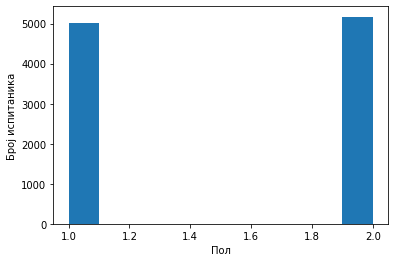

In [12]:
import matplotlib.pyplot as plt

# Исцртавамо графикон (plot) типа хистограм (hist) 
podaciDem['RIAGENDR'].plot(kind='hist')
# Дајемо име x-оси
plt.xlabel('Пол')
# Дајемо име и y-оси
plt.ylabel('Број испитаника')  
# Приказујемо графикон
plt.show() 

 Сада ћемо вредности исте варијабле исцртати на мало другачији начин. Нећемо их третирати као бројеве, већ као обичне ознаке или слова. Ознаке 1 и 2 ћемо пребројати помоћу функције `value_counts()`. Пошто се након примене ове функције вредности сортирају по њиховој учесталости, употребићемо и функцију `sort_values()`. На тај начин ћемо накнадно имати бољу контролу над ознакама вредности на x-оси коришћењем функције `xticks()`, јер ће вредност првог подеока бити 1 (мушко), а другог 2 (женско). То нам омогућава и да цифре заменимо словима која су разумљивија.  

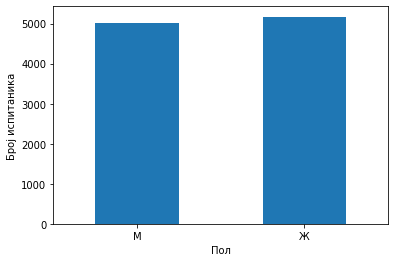

In [13]:
podaciDem['RIAGENDR'].value_counts().sort_values().plot(kind='bar') 
plt.xlabel('Пол')
plt.ylabel('Број испитаника')
plt.xticks(ticks=[0,1], labels=['М','Ж'], rotation=0) 
plt.show()

Дистрибуцију варијабле „пол“ исцртали смо на два начина, најпре хистограмом (hist), а потом стубичастим дијаграмом (bar). Иако су ови графикони на први поглед слични, међу њима постоји суштинска разлика. Први се обично користе за приказивање расподела *квантитативних* варијабли, а други за оне које су *квалитативне*. Вредности квантитативних варијабли означавају количину неког својства које поседује испитаник (нпр. висина), док вредности квалитативних означавају само припадност категорији (нпр. пол). Пошто су на горњем графикону вредности варијабле „пол“ биле третиране као нумеричке, хистограм је био исцртан са непотребним подеоцима, односно интервалима вредности на x-оси. 

У случају да је варијабла *категоријална*, односно квалитативна (нпр. брачни статус) или квантитативна са мањим бројем вредности (нпр. школске оцене), разлика између хистограма и стубичастог дијаграма није толико очигледна. Зато увек треба обратити пажњу на значење вредности приказаних на x-оси. Илустроваћемо то примером још неких демографских варијабли. Овога пута ћемо употребити функцију `subplots()` како бисмо направили мрежу графикона којом се оптимално користи простор на екрану. Имајте на уму да смо разбили код који је доста дугачак у нареднe 3 ћелијe како би био прегледнији и како бисмо постепено објаснили шта радимо. Иначе није уобичајено да се овакве мреже праве и попуњавају парцијално.

Дакле, формирајмо најпре мрежу димензија 2 x 3 са шест „кућица“ у које ћемо уметнути графиконе.

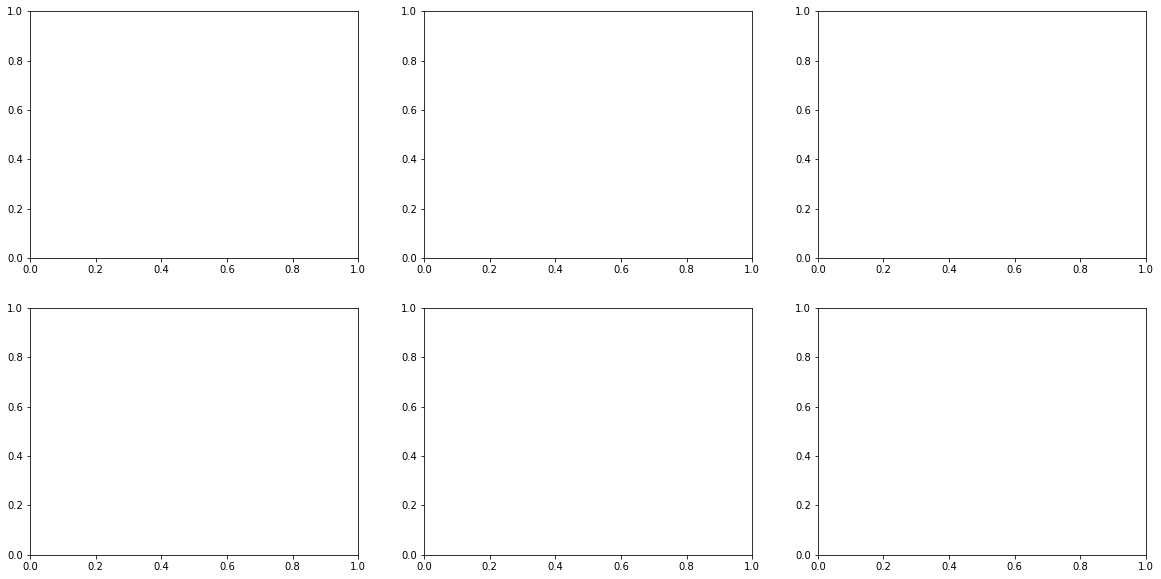

In [14]:
# Графички објекат (figure) смо назвали mreza, а сваку "кућицу" (axes) gr1 до gr6
mreza, ((gr1, gr2, gr3), (gr4, gr5, gr6)) = plt.subplots(2, 3, figsize=(20,10), facecolor='white')

„Кућице“ су за сада празне тако да за сваку од њих морамо да креирамо графикон. Почећемо са варијаблом „старост“ (RIDAGEYR). Графикон ћемо уметнути на прву осу формираног вишедимензионалног графичког објекта (gr1).

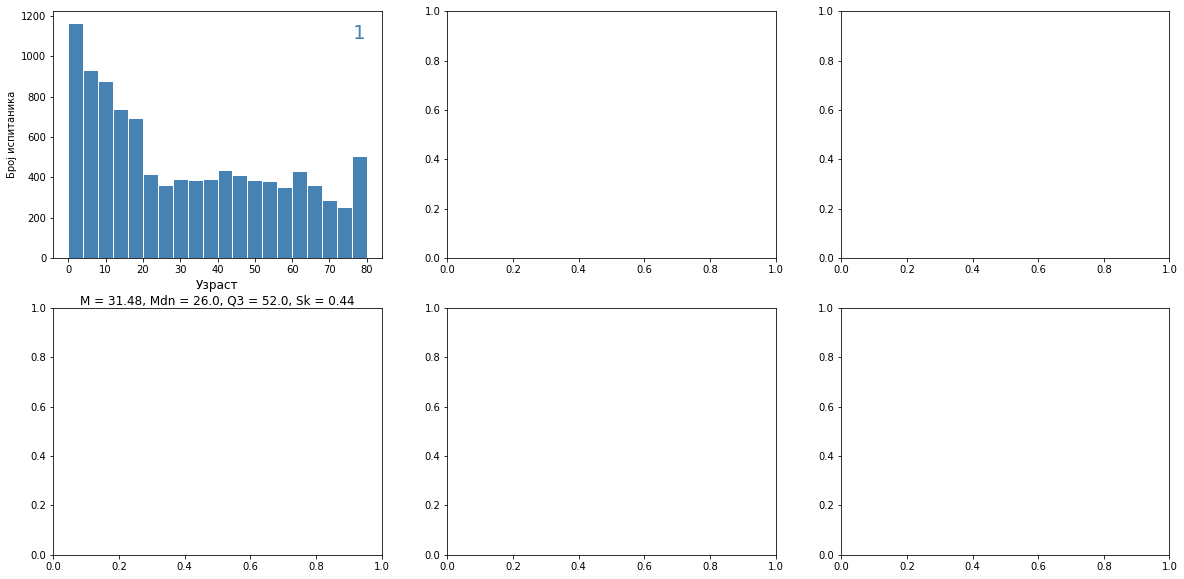

In [15]:
# Подесили смо боју оквира стубића на белу да би били визуелно раздвојени
# Подесили смо број стубића (бинс) на 20
podaciDem['RIDAGEYR'].plot(kind='hist', edgecolor='white', bins=20, ax=gr1, color='steelblue')

# У називу x-осе ће поред имена варијабле бити исписане и вредности неких описних показатеља.
# Пошто су у питању бројеви, морамо да их претворим у текст командом str()
gr1.set_xlabel('Узраст\n' # Ознаком \n умећемо прелом реда
    + 'M = ' + str(podaciDem['RIDAGEYR'].mean().round(2)) # Ознаком + повезујемо делове текста
    + ', Mdn = ' + str(podaciDem['RIDAGEYR'].median().round(2))
    + ', Q3 = ' + str(podaciDem['RIDAGEYR'].quantile(0.75).round(2))
    + ', Sk = ' + str(podaciDem['RIDAGEYR'].skew().round(2)), fontsize=12
    )
gr1.set_ylabel('Број испитаника')

# Додајемо број графикона у десни горњи угао (0.95, 0.95)
gr1.text(0.95, 0.95, '1', transform=gr1.transAxes, fontsize=20, color='steelblue', ha='right', va='top')

# Наглашавамо да не желимо да ознаке подеока буду заротиране
gr1.tick_params(labelrotation=0)

# Поново морамо да позовемо објекат mreza да би се графикони исцртали
mreza

Видите да је прва „кућица“ попуњена. По истом принципу ћемо генерисати графиконе и за преосталих пет варијабли и позиционирати их у пет празних „кућица“. Хоризонтални размак између њих је можда непотребно велик, а наслов x-осе првог графикона додирује четврти. У наредном кôду ћемо корговати и тај естетски аспект графикона.

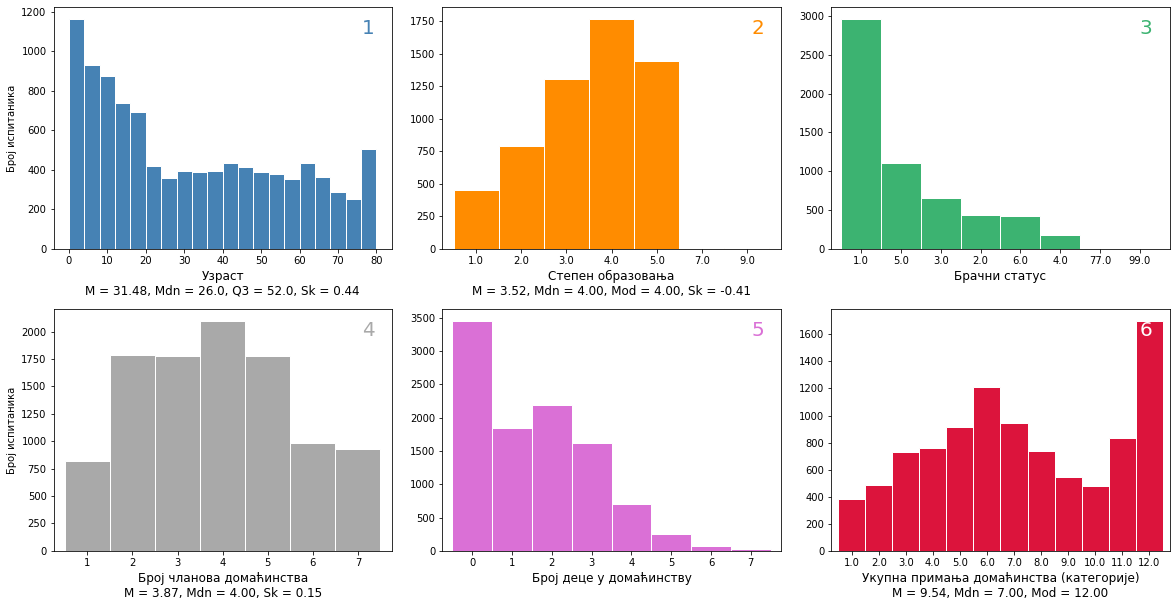

In [16]:
# Степен образовања
podaciDem['DMDEDUC2'].value_counts().sort_index().plot(kind='bar', width=1, edgecolor='white', ax=gr2, color='darkorange') 

# Оператором %.2f % вредности заоукружујемо на две децимале
AS = '%.2f' % podaciDem['DMDEDUC2'].mean()
Mdn = '%.2f' % podaciDem['DMDEDUC2'].median()
Mod = '%.2f' % podaciDem['DMDEDUC2'].mode()[0]
Sk = '%.2f' % podaciDem['DMDEDUC2'].skew()
# Вредности описних показатеља умећемо у назив x-осе
gr2.set_xlabel('Степен образовања\n' + 'M = ' + AS + ', Mdn = ' + Mdn + ', Mod = ' + Mod + ', Sk = ' + Sk, fontsize=12)
gr2.text(0.95, 0.95, '2', transform=gr2.transAxes, fontsize=20, color='darkorange', ha='right', va='top')
gr2.tick_params(labelrotation=0)

# Брачни статус
podaciDem['DMDMARTL'].value_counts().plot(kind='bar', width=1, edgecolor='white', ax=gr3, color='mediumseagreen') 
gr3.set_xlabel('Брачни статус', fontsize=12)
gr3.text(0.95, 0.95, '3', transform=gr3.transAxes, fontsize=20, color='mediumseagreen', ha='right', va='top')
gr3.tick_params(labelrotation=0)

# Број чланова домаћинства
podaciDem['DMDHHSIZ'].value_counts().sort_index().plot(kind='bar', width=1, edgecolor='white', ax=gr4, color='darkgray')
AS = '%.2f' % podaciDem['DMDHHSIZ'].mean()
Mdn = '%.2f' % podaciDem['DMDHHSIZ'].median()
Sk = '%.2f' % podaciDem['DMDHHSIZ'].skew()
gr4.set_xlabel('Број чланова домаћинства\n' + 'M = ' + AS + ', Mdn = ' + Mdn + ', Sk = ' + Sk, fontsize=12)
gr4.set_ylabel('Број испитаника')
gr4.text(0.95, 0.95, '4', transform=gr4.transAxes, fontsize=20, color='darkgray', ha='right', va='top')
gr4.tick_params(labelrotation=0)

# Пошто је број деце u домаћинству наведен у две одвојене варијабле,
# за децу млађу од 6 и старију од 5 година, пре приказивања израчунавамo њихову суму 
podaciDem['DMDHHSZAiB'] = podaciDem['DMDHHSZA'] + podaciDem['DMDHHSZB']
podaciDem['DMDHHSZAiB'].value_counts().sort_index().plot(kind='bar', width=1, edgecolor='white', ax=gr5, color='orchid')
gr5.set_xlabel('Број деце у домаћинству', fontsize=12)
gr5.text(0.95, 0.95, '5', transform=gr5.transAxes, fontsize=20, color='orchid', ha='right', va='top')
gr5.tick_params(labelrotation=0)

# Ознака ~ је оператор NOT - не желимо вредности из скупа [77,99]
podaciDem[~podaciDem['INDFMIN2'].isin([77,99])]['INDFMIN2'].value_counts().sort_index().plot(kind='bar', width=1, edgecolor='white', ax=gr6, color='crimson')
AS = '%.2f' % podaciDem['INDFMIN2'].mean()
Mdn = '%.2f' % podaciDem['INDFMIN2'].median()
Mod = '%.2f' % podaciDem['INDFMIN2'].mode()[0]
gr6.set_xlabel('Укупна примања домаћинства (категорије)\n' + 'M = ' + AS + ', Mdn = ' + Mdn + ', Mod = ' + Mod, fontsize=12)
gr6.text(0.95, 0.95, '6', transform=gr6.transAxes, fontsize=20, color='white', ha='right', va='top')
gr6.tick_params(labelrotation=0)

# Мало ћемо смањити вертикални (hspace) и хоризонтални (wspace) простор између "кућица"
mreza.subplots_adjust(hspace=0.25, wspace=0.15)

# Приказујемо коначну верзију мреже, односно графички објекат који се састоји од шест (под)графикона
mreza

Погледајмо најпре зелени графикон (бр. 3) којим је приказана расподела испитаника по категоријама брачног статуса. Нисмо употребили функцију `sort_values()` јер је у питању квалитативна варијабла, па самим тим нумеричке вредности немају ознаку количине или изражености својства, већ служе само као ознака групе. Најфреквентија група је 1 (особе у браку), након чега следе групе 5 (никад нису били у браку) и 3 (разведени). Неколико испитаника није желело да дâ одговор (77) или није знало одговор (99). Сличне вредности су употребљене за означавање нивоа образовања на наранџастом графикону (бр. 2), али овога пута смо их сортирали јер ипак имају квантитативно значење. Наиме, бројеви нам у овом случају омогућавају да испитанике барем рангирамо по томе који су степен образовања стекли: 1 - мање од основне школе, 2 - основна школа, 3 - средња школа итд. Међутим, и овде постоје ознаке за испитанике који нису желели или нису могли да се изјасне (7 и 9). Ове вредности би у свакој наредној анализи требало избацити, најпре зато што не одговарају логици преосталих вредности (1 < 2 < 3 < 4 < 5), али и зато што их је сразмерно мало. На крају, категоризација је направљена и на основу укупних примања домаћинства: 1 - од 0 до 4.999 долара, 2 - од 5.000 до 9.999, 3 - од 10.000 до 14.999 итд. Ова дистрибуција је приказана на црвеном графикону (бр. 6). Уочите да смо графикон исцртали након што смо из скупа података уклонили вредности 77 и 79 коришћењем оператора негације `~` и функције `isin()`.

Из наведених примера смо видели да слика расподеле података пружа пуно драгоцених информација не само о томе да ли постоје атипичне вредности варијабле, већ и о самој методологији прикупљања података. На пример, на основу плавог графикона (бр. 1) могло би се закључити да је у узорку било око 500 испитаника старих 80 година, али су заправо у ову групу сврстане све особе које имају 80 или више година. То значи да би дистрибуција узраста имала још издуженији „реп“ са десне стране да су забележене тачне године старијих испитаника. Овакав облик дистрибуције називамо *искошеним удесно*. Постоји и статистички показатељ који показује да ли је дистрибуција симетрична и зове се *скјунис* од енглеске речи *skew* што значи „искошено“. За дистрибуцију 2 је он већи од нуле, док је за дистрибуције *искошене улево* негативан, као нпр. на наранџастом графикону (бр. 2). Слична агрегација испитаника је обављена и у случају укупних примања где су домаћинства са више од 100.000 долара прихода смештена у категорију 12. Обратите пажњу какав је однос између *аритметичке средине* (M) различитих аритметичке и њихове *медијане*, односно средишње вредности (Mdn) и *мода*, односно најчешће вредности (Mod). Ове вредности можете да видите испода назива x-оса на појединим графиконима. Такође обратите пажњу да је за варијабле којима су означене категорије вредности оправданије користити медијану или мод, на пример за варијаблу приказану на црвеном графикону (бр. 6).

На крају, анализирајте информативност различитих описних показатеља дистрибуције. На пример, уочите да је на плавом графикону (бр. 1) аритметичка средина већа од медијане. Због искошености расподеле, аритметичка средина није иста као и средња вредност, већ је померена навише. Дакле, могли бисте да кажете да је половина испитаника у узорку млађа од 26, а не од 31.5 године. Исто тако, коришћењем тзв. *квартила*, који испитанике деле у 4 једнако бројне групе, можете да видите да је око две трећине испитаника (75%) млађе од 52 године, што је вредност трећег квартила (Q3).

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Исцртајте поново графикон за степен образовања, али претходно искључите вредности 7 и 9. Покушајте то да урадите на другачији начин од онога који смо користили, не користећи функцију <b>isin()</b>. Искористите чињеницу да су то вредности мање од неког броја.</div> 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>На основу љубичастог графикона (бр. 5) одредите колико деце има типично америчко домаћинство. Покушајте да процените колике су вредности M, Mdn и Sk за ову дистрибуцију, а потом их израчунајте. Најједноставније је да копирате код који је дат као параметар функције <i>str()</i>.</div> 

На крају ћемо погледати и како изгледају дистрибуције типичних резултата лабораторијске анализе крви. Употребићимо кутијасти дијаграм (енгл. *boxplot*) којим се истовремено приказује и место груписања и степен распршења резултата. У првом кораку ћемо уз помоћ библиотеке `seaborn` визуализовати варијаблу LDL или тзв. "лоши" холестерол (LBDLDLSI). Паралелно ћемо приказати и хистограм за исту варијаблу да бисте лакше разумели логику кутијастог дијаграма.

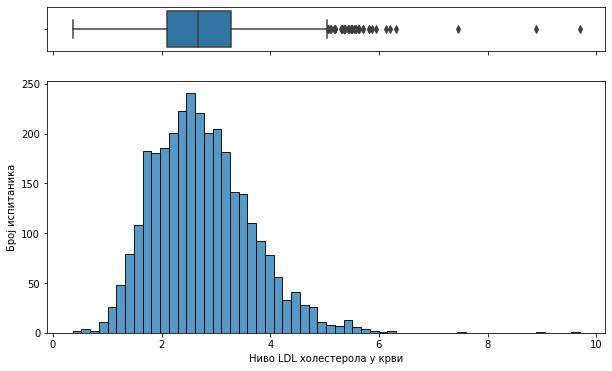

In [17]:
# Увозимо библиотеку seaborn
import seaborn as sbrn

# Увозимо подате о лабораторијским анализама
podaciLab = pd.read_csv('podaci/labs.csv')

# Креирамо објекат figure (мрежу) са две осе ("кућице") (ax_box и ax_hist)
# "Кућице" ће делити x-осу (sahrex=True), a visine će im biti u odnosu 20% : 80%
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={'height_ratios': (0.15, 0.85)})
 
# У горњој "кућици" приказаћемо кутијасти дијаграм
sbrn.boxplot(data=podaciLab['LBDLDLSI'], orient="h", ax=ax_box)
# а у доњој хистограм за исту варијаблу
sbrn.histplot(data=podaciLab['LBDLDLSI'], ax=ax_hist)
 
# Уклањамо име и подеоке y-осе кутијастог дијаграма
ax_box.set(xlabel='', yticklabels='')

# Подешавамо назив x-осе хистограма 
ax_hist.set(xlabel='Ниво LDL холестерола у крви', ylabel='Број испитаника')

plt.show()

Централна линија у кутији означава медијану, а димензије кутије одговарају распону средишњих 50% резултата, односно резултата који се налазе између првог и трећег квартила. Први квартил (Q<sub>1</sub>) је вредности испод које се налази 25% испитаника, а трећи (Q<sub>3</sub>) вредност изнад које се налази 25% испитаника. Други квартил је заправо централна вредност или медијана. Распон између првог и трећег квартила је познат као *интерквартилни распон*. Обратите пажњу да су и на хистограму највиши стубићи управо у овом распону.

Кружићима су представљени резултати који изразито одступају од централне вредности дистрибуције, тзв. *аберантни резултати*. Ове резултате у статистици називамо *аутлајерима* према енглеској речи *outlier* која означава објекат изван одређеног опсега. Због њих готово трећина хистограма делује празно. Неколико издвојених вредности изнад 7 много лакше се уочава на кутијастом дијаграму. У наредним анализама систематски ћемо избацивати ове екстремне резултате како бисмо унапредили прегледност графикона, али и поузданост просечних вредности које би биле неоправдано високе када бисмо их задржали.

<div class="alert alert-block alert-success"><img src="slike/recnik.png" align="left"/>У речнику који се налази на крају курса можете да пронађете дефиниције појмова које смо употребили. Можда ће вам бити лакше да их разумете на примеру школских оцена.</div> 

Сада ћемо кутијастим дијаграмима приказати ниво триглицерида (LBDTRSI), LDL („лошег“) холестеролa (LBDLDLSI) и HDL („доброг“) холестерола (LBDHDDSI).

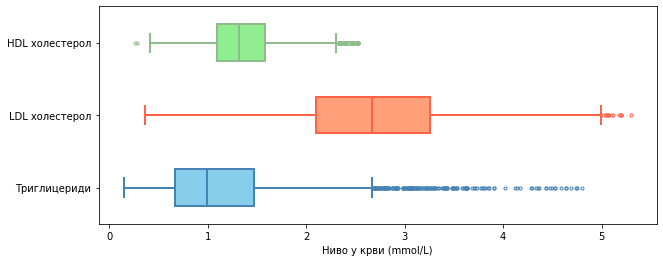

In [18]:
# Дефинишемо величину графикона
plt.figure(figsize=(10,4))

# Искључујемо 1% екстремно високих вредности сваке варијабле 
grafikon = plt.boxplot([podaciLab[podaciLab['LBDTRSI'] < podaciLab['LBDTRSI'].quantile(0.99)]['LBDTRSI'], 
    podaciLab[podaciLab['LBDLDLSI'] < podaciLab['LBDLDLSI'].quantile(0.99)]['LBDLDLSI'],
    podaciLab[podaciLab['LBDHDDSI'] < podaciLab['LBDHDDSI'].quantile(0.99)]['LBDHDDSI']], 
    vert=False, patch_artist=True, widths=(0.5, 0.5, 0.5))

# Ово су боје које ћемо користити за кутије
boje1 = ['skyblue', 'lightsalmon', 'lightgreen']
# Ово су боје које ћемо користити за оквире кутија и "брчиће"
boje2 = ['steelblue', 'steelblue', 'tomato', 'tomato', 'darkseagreen', 'darkseagreen']

# У овој петљи за сваку кутиу у скупу од три кутије (боxес) подешавамо боју
# кутија и облик маркера преко функције setp (set parameter)
for rb, kutija in enumerate(grafikon["boxes"]):
    plt.setp(kutija, facecolor=boje1[rb], edgecolor=boje2[rb*2], linewidth=2)
    plt.setp(grafikon['fliers'][rb], markeredgecolor=boje2[rb*2], marker='.')

# У овој сређујемо "брчиће"
for rb, brcici in enumerate(grafikon['whiskers']): 
    brcici.set(color =boje2[rb], linewidth = 2)

# У овој вертикалне линије распона
for rb, raspon in enumerate(grafikon['caps']): 
    raspon.set(color =boje2[rb], linewidth = 2)  

# У овој линије којима су исцртане медијане
for rb, medijane in enumerate(grafikon['medians']): 
    medijane.set(color =boje2[rb*2], linewidth = 2)

# Подешавамо ознаке подеока на y-оси
oznakeY = plt.yticks(ticks=[1, 2, 3], labels=['Триглицериди','LDL холестерол','HDL холестерол'], rotation=0)

# Додељујемо назив x-оси
nazivX = plt.xlabel('Ниво у крви (mmol/L)')  

За почетак, на основу броја кружића видимо да је и поред искључивања 1% екстремно високих вредности остало доста испитаника којима су резултати веома високи у односу на типичне вредности. Просечна и централна вредност су највише за LDL, али то не значи да је ту и највећи потенцијални проблем за испитанике јер су можда референтне или „нормалне“ вредности за тај показатељ више од осталих. LDL холестерол има и највећу варијабилност унутар 50% средњих вредности, а HDL најмању што видимо по распону „брчића“ и дужини кутија.

Обратите пажњу да смо уместо линије кода `for element in skup` употребили петљу у формату `for rb, element in enumerate(skup)`. Методом `enumerate()` смо додали бројач елемената који генерише бројеве од `0` до `број елемената - 1`. На тај начин варијабла `rb` добија редни број вредности сваког елемента скупа, а варијабла `element` вредност елемента na rednom broju `rb`. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Потражите на интернету <a href='https://milleniummedic.rs/holesterol-trigliceridi-lipidni-status/'>референтне вредности</a> приказаних показатеља и анализирајте дистрибуције у односу на њих. Да ли испитаници имају генерално повишене вредности или не?</div> 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Покушајте самостално да мењате изглед маркера аберантних резултата и линија на кутијастом дијаграму. Потражите на интернету доступне параметре функције <a href='https://matplotlib.org/stable/api/markers_api.html'><b>markers</b></a> и својства класе <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html'><b>line2D</b></a> библиотеке <b>matplotlib</b>.</div> 

**Како описати јавно здравље**

На основу примера из ове лекције могли сте да стекнете увид у то колико је описивање јавног здравља комплексан проблем. Најпре, у питанју је мултидимензионалан феномен који захтева прикуплјане великих количина података — од физичких меренја, преко лабораторијских анализа, до упитничких студија. Осим тога, подаци морају да буду прикуплјени на великим и репрезентативним узорцима како би се стекла адекватна слика здравственог станја целе нације.